<a href="https://colab.research.google.com/github/venkatatharu/ClimateScope_project_venkata_tharun_Avuluri/blob/main/Copy_of_climate_scope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ClimateScope:Visualizing Global Weather Trends and Extreme Events

# Project objective
The objective of ClimateScope is to analyze and visually represent global weather patterns
using the Global Weather Repository dataset. This project aims to uncover seasonal trends,
regional variations, and extreme weather events through interactive and insightful visualizations.
By leveraging daily-updated, worldwide weather data, the project will enable users to explore
climate behavior over time, compare conditions across regions, and identify anomalies. The
ultimate goal is to provide an accessible, data-driven platform that supports climate awareness,
decision-making, and further research into global weather dynamics.

Milestone 1: Data Preparation & Initial Analysis

In [ ]:
#Download the Global Weather Repository dataset from Kaggle by using opendatasets
!pip install opendatasets

In [ ]:
import opendatasets as od #venkata777 #841f14d339398dbe1f883d3bbaad279c
od.download("https://www.kaggle.com/datasets/nelgiriyewithana/global-weather-repository/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: venkata777
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/global-weather-repository


100%|██████████| 7.21M/7.21M [00:00<00:00, 922MB/s]

Building project environment


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/global-weather-repository/GlobalWeatherRepository.csv') #reading the file

In [ ]:
df.shape # to see total observation and colums present in data set


(91002, 41)

In [ ]:
pd.set_option('display.max_columns', 41) # to see all columns

In [ ]:
df.head() # to see top 5 row's

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,8.3,13.3,338,NNW,1012.0,29.89,0.0,0.00,24,30,25.3,77.5,10.0,6.0,7.0,9.5,15.3,277.0,103.0,1.1,0.2,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,6.9,11.2,320,NW,1012.0,29.88,0.1,0.00,94,75,19.0,66.2,10.0,6.0,5.0,11.4,18.4,193.6,97.3,0.9,0.1,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,9.4,15.1,280,W,1011.0,29.85,0.0,0.00,29,0,24.6,76.4,10.0,6.0,5.0,13.9,22.3,540.7,12.2,65.1,13.4,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,7.4,11.9,215,SW,1007.0,29.75,0.3,0.01,61,100,3.8,38.9,2.0,1.0,2.0,8.5,13.7,170.2,64.4,1.6,0.2,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,8.1,13.0,150,SSE,1011.0,29.85,0.0,0.00,89,50,28.7,83.6,10.0,6.0,8.0,12.5,20.2,2964.0,19.0,72.7,31.5,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [ ]:
df.tail()# to see bottom 5 row's

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
90997,Venezuela,Caracas,10.5000,-66.9167,America/Caracas,1756281600,2025-08-27 04:00,26.0,78.8,Partly cloudy,4.0,6.5,171,S,1015.0,29.97,0.00,0.00,100,50,29.9,85.8,10.0,6.0,0.0,8.5,13.6,943.50,46.0,16.465,4.625,11.655,11.840,1,1,06:18 AM,06:40 PM,09:38 AM,09:37 PM,Waxing Crescent,15
90998,Vietnam,Hanoi,21.0333,105.8500,Asia/Bangkok,1756281600,2025-08-27 15:00,29.2,84.6,Light rain shower,8.7,14.0,142,SE,1007.0,29.74,0.21,0.01,79,25,34.5,94.1,10.0,6.0,1.1,10.8,17.4,630.85,37.0,39.590,27.380,27.380,27.935,2,3,05:39 AM,06:17 PM,08:53 AM,08:37 PM,Waxing Crescent,12
90999,Yemen,Sanaa,15.3547,44.2067,Asia/Aden,1756281600,2025-08-27 11:00,23.4,74.2,Patchy rain nearby,2.2,3.6,350,N,1011.0,29.86,0.08,0.00,39,84,24.5,76.1,10.0,6.0,12.2,2.6,4.1,331.15,76.0,4.440,4.070,33.115,134.310,2,3,05:50 AM,06:19 PM,09:03 AM,08:55 PM,Waxing Crescent,13
91000,Zambia,Lusaka,-15.4167,28.2833,Africa/Lusaka,1756281600,2025-08-27 10:00,24.9,76.8,Sunny,11.9,19.1,71,ENE,1021.0,30.15,0.00,0.00,13,0,23.7,74.7,10.0,6.0,6.2,13.6,22.0,438.45,119.0,1.850,2.405,31.080,32.375,2,3,06:16 AM,06:01 PM,08:44 AM,09:32 PM,Waxing Crescent,13
91001,Zimbabwe,Harare,-17.8178,31.0447,Africa/Harare,1756281600,2025-08-27 10:00,21.9,71.4,Sunny,11.9,19.1,70,ENE,1024.0,30.23,0.00,0.00,13,0,21.9,71.4,10.0,6.0,6.8,13.6,22.0,680.80,126.0,10.175,4.070,97.310,101.195,4,10,06:07 AM,05:48 PM,08:31 AM,09:23 PM,Waxing Crescent,13


In [ ]:
df.info()#Inspect dataset structure, data types, and key variables.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91002 entries, 0 to 91001
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       91002 non-null  object 
 1   location_name                 91002 non-null  object 
 2   latitude                      91002 non-null  float64
 3   longitude                     91002 non-null  float64
 4   timezone                      91002 non-null  object 
 5   last_updated_epoch            91002 non-null  int64  
 6   last_updated                  91002 non-null  object 
 7   temperature_celsius           91002 non-null  float64
 8   temperature_fahrenheit        91002 non-null  float64
 9   condition_text                91002 non-null  object 
 10  wind_mph                      91002 non-null  float64
 11  wind_kph                      91002 non-null  float64
 12  wind_degree                   91002 non-null  int64  
 13  w

In [ ]:
df.nunique() # to see number of unique values present in each column


,0
country,211
location_name,254
latitude,393
longitude,398
timezone,197
last_updated_epoch,891
last_updated,15372
temperature_celsius,655
temperature_fahrenheit,1080
condition_text,47


In [ ]:
df.drop_duplicates() #droping the duplicates from datt set

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.5200,69.1800,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,8.3,13.3,338,NNW,1012.0,29.89,0.00,0.00,24,30,25.3,77.5,10.0,6.0,7.0,9.5,15.3,277.00,103.0,1.100,0.200,8.400,26.600,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.3300,19.8200,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,6.9,11.2,320,NW,1012.0,29.88,0.10,0.00,94,75,19.0,66.2,10.0,6.0,5.0,11.4,18.4,193.60,97.3,0.900,0.100,1.100,2.000,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.7600,3.0500,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,9.4,15.1,280,W,1011.0,29.85,0.00,0.00,29,0,24.6,76.4,10.0,6.0,5.0,13.9,22.3,540.70,12.2,65.100,13.400,10.400,18.400,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.5000,1.5200,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,7.4,11.9,215,SW,1007.0,29.75,0.30,0.01,61,100,3.8,38.9,2.0,1.0,2.0,8.5,13.7,170.20,64.4,1.600,0.200,0.700,0.900,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.8400,13.2300,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,8.1,13.0,150,SSE,1011.0,29.85,0.00,0.00,89,50,28.7,83.6,10.0,6.0,8.0,12.5,20.2,2964.00,19.0,72.700,31.500,183.400,262.300,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90997,Venezuela,Caracas,10.5000,-66.9167,America/Caracas,1756281600,2025-08-27 04:00,26.0,78.8,Partly cloudy,4.0,6.5,171,S,1015.0,29.97,0.00,0.00,100,50,29.9,85.8,10.0,6.0,0.0,8.5,13.6,943.50,46.0,16.465,4.625,11.655,11.840,1,1,06:18 AM,06:40 PM,09:38 AM,09:37 PM,Waxing Crescent,15
90998,Vietnam,Hanoi,21.0333,105.8500,Asia/Bangkok,1756281600,2025-08-27 15:00,29.2,84.6,Light rain shower,8.7,14.0,142,SE,1007.0,29.74,0.21,0.01,79,25,34.5,94.1,10.0,6.0,1.1,10.8,17.4,630.85,37.0,39.590,27.380,27.380,27.935,2,3,05:39 AM,06:17 PM,08:53 AM,08:37 PM,Waxing Crescent,12
90999,Yemen,Sanaa,15.3547,44.2067,Asia/Aden,1756281600,2025-08-27 11:00,23.4,74.2,Patchy rain nearby,2.2,3.6,350,N,1011.0,29.86,0.08,0.00,39,84,24.5,76.1,10.0,6.0,12.2,2.6,4.1,331.15,76.0,4.440,4.070,33.115,134.310,2,3,05:50 AM,06:19 PM,09:03 AM,08:55 PM,Waxing Crescent,13
91000,Zambia,Lusaka,-15.4167,28.2833,Africa/Lusaka,1756281600,2025-08-27 10:00,24.9,76.8,Sunny,11.9,19.1,71,ENE,1021.0,30.15,0.00,0.00,13,0,23.7,74.7,10.0,6.0,6.2,13.6,22.0,438.45,119.0,1.850,2.405,31.080,32.375,2,3,06:16 AM,06:01 PM,08:44 AM,09:32 PM,Waxing Crescent,13


In [ ]:
df.isnull().sum() # finding the number of null vales presend in each column

,0
country,0
location_name,0
latitude,0
longitude,0
timezone,0
last_updated_epoch,0
last_updated,0
temperature_celsius,0
temperature_fahrenheit,0
condition_text,0


In [ ]:
df.describe(include="all") #understanding the data set by using describe

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
count,91002,91002,91002.000000,91002.000000,91002,9.100200e+04,91002,91002.000000,91002.000000,91002,91002.000000,91002.000000,91002.000000,91002,91002.000000,91002.000000,91002.000000,91002.000000,91002.000000,91002.000000,91002.000000,91002.000000,91002.000000,91002.000000,91002.000000,91002.000000,91002.000000,91002.000000,91002.000000,91002.000000,91002.000000,91002.000000,91002.000000,91002.000000,91002.000000,91002,91002,91002,91002,91002,91002.000000
unique,211,254,NaN,NaN,197,NaN,15372,NaN,NaN,47,NaN,NaN,NaN,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,458,544,1441,1441,8,NaN
top,Bulgaria,Kabul,NaN,NaN,Asia/Bangkok,NaN,2024-11-15 10:00,NaN,NaN,Partly cloudy,NaN,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05:56 AM,06:28 PM,No moonrise,No moonset,Waxing Gibbous,NaN
freq,975,468,NaN,NaN,1812,NaN,44,NaN,NaN,28761,NaN,NaN,NaN,8682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,968,881,3107,2912,20156,NaN
mean,NaN,NaN,19.129393,22.160837,NaN,1.736113e+09,NaN,22.734965,72.924677,NaN,8.279487,13.327779,170.835048,NaN,1013.946045,29.941188,0.140960,0.005355,63.826312,39.424112,23.756635,74.755554,9.634084,5.703270,3.949319,11.616088,18.696315,516.771931,63.478177,15.554526,11.293133,26.208397,54.270430,1.760818,2.767423,NaN,NaN,NaN,NaN,NaN,49.938309
std,NaN,NaN,24.468168,65.834747,NaN,1.170190e+07,NaN,9.033965,16.260912,NaN,8.055418,12.961660,103.037084,NaN,11.660352,0.344275,0.599559,0.023692,24.236289,33.770500,10.753332,19.354099,2.521525,1.567058,3.627325,9.294428,14.958048,854.210938,32.778878,25.971216,41.793241,41.326203,164.712842,0.985995,2.582932,NaN,NaN,NaN,NaN,NaN,35.158678
min,NaN,NaN,-41.300000,-175.200000,NaN,1.715849e+09,NaN,-24.900000,-12.800000,NaN,2.200000,3.600000,1.000000,NaN,947.000000,27.960000,0.000000,0.000000,2.000000,0.000000,-35.600000,-32.100000,0.000000,0.000000,0.000000,2.200000,3.600000,-9999.000000,0.000000,0.000000,-9999.000000,0.168000,-1848.150000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,3.750000,-6.836100,NaN,1.726056e+09,NaN,18.000000,64.400000,NaN,4.000000,6.500000,82.000000,NaN,1010.000000,29.830000,0.000000,0.000000,47.000000,0.000000,18.000000,64.400000,10.000000,6.000000,0.600000,6.600000,10.600000,236.800000,43.000000,1.295000,0.800000,7.215000,10.545000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,15.000000
50%,NaN,NaN,17.250000,23.316700,NaN,1.736159e+09,NaN,25.000000,77.000000,NaN,6.900000,11.200000,164.000000,NaN,1013.000000,29.920000,0.000000,0.000000,69.000000,27.000000,26.000000,78.800000,10.000000,6.000000,3.200000,10.000000,16.100000,327.450000,61.000000,4.625000,2.405000,14.985000,22.015000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,50.000000
75%,NaN,NaN,40.400000,50.580000,NaN,1.746263e+09,NaN,28.400000,83.100000,NaN,11.400000,18.400000,257.000000,NaN,1017.000000,30.040000,0.030000,0.000000,83.000000,75.000000,30.900000,87.500000,10.000000,6.000000,7.000000,15.400000,24.800000,505.050000,80.100000,17.390000,9.065000,30.155000,46.805000,2.000000,3.000000,NaN,NaN,NaN,NaN,NaN,85.000000


droping the duplicate units

In [ ]:
df_clean = df.drop(columns=[
    "temperature_fahrenheit",    #actually represent the same measurement but in different units
    "feels_like_fahrenheit",     #total 7 of them
    "wind_mph",
    "gust_mph",
    "pressure_in",
    "precip_in",
    "visibility_miles"
])
from IPython.display import display
display(df_clean.head())

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,condition_text,wind_kph,wind_degree,wind_direction,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,Partly Cloudy,13.3,338,NNW,1012.0,0.0,24,30,25.3,10.0,7.0,15.3,277.0,103.0,1.1,0.2,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,Partly cloudy,11.2,320,NW,1012.0,0.1,94,75,19.0,10.0,5.0,18.4,193.6,97.3,0.9,0.1,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,Sunny,15.1,280,W,1011.0,0.0,29,0,24.6,10.0,5.0,22.3,540.7,12.2,65.1,13.4,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,Light drizzle,11.9,215,SW,1007.0,0.3,61,100,3.8,2.0,2.0,13.7,170.2,64.4,1.6,0.2,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,Partly cloudy,13.0,150,SSE,1011.0,0.0,89,50,28.7,10.0,8.0,20.2,2964.0,19.0,72.7,31.5,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [ ]:
df_clean["last_updated"] = pd.to_datetime(df_clean["last_updated"]) #last_updated column is still a string (object dtype), not a proper datetime
                                                                    #Converting  column to datetime


In [ ]:
#same coverting srting data type into datatime data type
# why python detecting string data type because  in data set columes (moonrise and moonset) data has  "No moonrise" doesn’t match the time format.
# so i make it Nat and replace with None
df_clean["sunrise"]  = pd.to_datetime(df_clean["sunrise"],  format="%I:%M %p", errors="coerce").dt.time.astype(str).replace("NaT", "None")
df_clean["sunset"]   = pd.to_datetime(df_clean["sunset"],   format="%I:%M %p", errors="coerce").dt.time.astype(str).replace("NaT", "None")
df_clean["moonrise"] = pd.to_datetime(df_clean["moonrise"], format="%I:%M %p", errors="coerce").dt.time.astype(str).replace("NaT", "None")
df_clean["moonset"]  = pd.to_datetime(df_clean["moonset"],  format="%I:%M %p", errors="coerce").dt.time.astype(str).replace("NaT", "None")


In [ ]:
df_clean.to_csv('df_clean.csv', index=False) #Save the cleaned dataframe into a CSV file named 'df_clean.csv' .

In [ ]:
df1=pd.read_csv('df_clean.csv') #reading the 'df_clean.csv' file.

In [ ]:
df1.head() # seeing the top 5 row's in 'df_clean.csv'  file.

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,condition_text,wind_kph,wind_degree,wind_direction,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15:00,26.6,Partly Cloudy,13.3,338,NNW,1012.0,0.0,24,30,25.3,10.0,7.0,15.3,277.0,103.0,1.1,0.2,8.4,26.6,1,1,04:50:00,18:50:00,12:12:00,01:11:00,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45:00,19.0,Partly cloudy,11.2,320,NW,1012.0,0.1,94,75,19.0,10.0,5.0,18.4,193.6,97.3,0.9,0.1,1.1,2.0,1,1,05:21:00,19:54:00,12:58:00,02:14:00,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45:00,23.0,Sunny,15.1,280,W,1011.0,0.0,29,0,24.6,10.0,5.0,22.3,540.7,12.2,65.1,13.4,10.4,18.4,1,1,05:40:00,19:50:00,13:15:00,02:14:00,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45:00,6.3,Light drizzle,11.9,215,SW,1007.0,0.3,61,100,3.8,2.0,2.0,13.7,170.2,64.4,1.6,0.2,0.7,0.9,1,1,06:31:00,21:11:00,14:12:00,03:31:00,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45:00,26.0,Partly cloudy,13.0,150,SSE,1011.0,0.0,89,50,28.7,10.0,8.0,20.2,2964.0,19.0,72.7,31.5,183.4,262.3,5,10,06:12:00,17:55:00,13:17:00,00:38:00,Waxing Gibbous,55


In [ ]:
 #Aggregate / Filter Data (Daily → Monthly Averages)
df_monthly = (
    df_clean
    .set_index("last_updated")
    .groupby("country")
    .resample("ME")
    .mean(numeric_only=True)
    .reset_index()
)
display(df_monthly.head())



,country,last_updated,latitude,longitude,last_updated_epoch,temperature_celsius,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
0,Afghanistan,2024-05-31,34.52,69.18,1.716478e+09,20.305882,11.517647,127.941176,1010.000000,0.108824,38.058824,31.764706,20.358824,9.764706,3.764706,16.141176,1424.094118,77.452941,16.400000,0.588235,7.894118,17.411765,1.000000,1.117647,78.647059
1,Afghanistan,2024-06-30,34.52,69.18,1.718503e+09,25.590000,17.110000,126.833333,1004.900000,0.072667,24.833333,20.833333,24.603333,9.800000,6.500000,20.336667,1481.570000,87.650000,17.000000,0.530000,7.380000,16.786667,1.000000,1.066667,49.800000
2,Afghanistan,2024-07-31,34.52,69.18,1.721101e+09,31.303448,20.731034,103.862069,998.000000,0.000345,17.931034,13.068966,29.475862,10.000000,7.758621,23.841379,624.758621,119.327586,4.700000,0.306897,9.065517,23.596552,1.068966,1.137931,43.758621
3,Afghanistan,2024-08-31,34.52,69.18,1.723811e+09,30.848387,20.196774,57.709677,1001.258065,0.037097,20.548387,11.903226,29.316129,9.774194,7.483871,23.238710,605.025806,119.612903,3.641935,0.306452,9.638710,22.674194,1.032258,1.225806,45.548387
4,Afghanistan,2024-09-30,34.52,69.18,1.726442e+09,28.216667,12.223333,67.566667,1004.800000,0.014333,13.733333,13.066667,26.390000,9.833333,7.000000,14.063333,376.173333,138.046667,2.523667,13.977000,20.996833,42.791667,1.666667,2.366667,46.100000


In [ ]:
df_monthly.to_csv('df_monthly.csv', index=False) #Save the monthly dataframe into a CSV file named 'df_monthly.csv' .

In [ ]:
df2=pd.read_csv('df_monthly.csv') # reading the file

In [ ]:
df2.head() # seeing tos 5 row'5 in 'df_monthly.csv' file

,country,last_updated,latitude,longitude,last_updated_epoch,temperature_celsius,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
0,Afghanistan,2024-05-31,34.52,69.18,1.716478e+09,20.305882,11.517647,127.941176,1010.000000,0.108824,38.058824,31.764706,20.358824,9.764706,3.764706,16.141176,1424.094118,77.452941,16.400000,0.588235,7.894118,17.411765,1.000000,1.117647,78.647059
1,Afghanistan,2024-06-30,34.52,69.18,1.718503e+09,25.590000,17.110000,126.833333,1004.900000,0.072667,24.833333,20.833333,24.603333,9.800000,6.500000,20.336667,1481.570000,87.650000,17.000000,0.530000,7.380000,16.786667,1.000000,1.066667,49.800000
2,Afghanistan,2024-07-31,34.52,69.18,1.721101e+09,31.303448,20.731034,103.862069,998.000000,0.000345,17.931034,13.068966,29.475862,10.000000,7.758621,23.841379,624.758621,119.327586,4.700000,0.306897,9.065517,23.596552,1.068966,1.137931,43.758621
3,Afghanistan,2024-08-31,34.52,69.18,1.723811e+09,30.848387,20.196774,57.709677,1001.258065,0.037097,20.548387,11.903226,29.316129,9.774194,7.483871,23.238710,605.025806,119.612903,3.641935,0.306452,9.638710,22.674194,1.032258,1.225806,45.548387
4,Afghanistan,2024-09-30,34.52,69.18,1.726442e+09,28.216667,12.223333,67.566667,1004.800000,0.014333,13.733333,13.066667,26.390000,9.833333,7.000000,14.063333,376.173333,138.046667,2.523667,13.977000,20.996833,42.791667,1.666667,2.366667,46.100000


In [ ]:
#Aggregate / Filter Data (Daily → yearly Averages)
df_yearly = (
    df_clean                            #Aggregate / Filter
    .set_index('last_updated')
    .groupby('country')
    .resample('YE')
    .mean(numeric_only=True)
    .reset_index()
)
df_yearly.head()

,country,last_updated,latitude,longitude,last_updated_epoch,temperature_celsius,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
0,Afghanistan,2024-12-31,34.518703,69.181297,1.725745e+09,22.696943,12.113974,99.257642,1008.096070,0.038603,22.497817,16.419214,21.810044,9.890830,5.057205,15.079476,774.743013,107.629258,7.655328,7.974389,14.860000,28.745873,1.388646,1.772926,48.672489
1,Afghanistan,2025-12-31,34.516700,69.183300,1.746005e+09,20.321757,8.361925,126.359833,1009.631799,0.042636,27.066946,17.933054,18.819665,9.778243,6.801674,10.457322,687.534310,130.280335,6.498222,12.723975,25.022218,66.795837,1.882845,2.669456,51.246862
2,Albania,2024-12-31,41.329017,19.819568,1.725745e+09,25.022271,11.429694,237.855895,1014.899563,0.169651,49.532751,26.205240,25.559389,9.851092,5.010917,15.961572,257.638646,83.346288,10.230000,4.604236,13.593777,18.724323,1.349345,1.672489,48.606987
3,Albania,2025-12-31,41.327500,19.818900,1.746004e+09,21.242259,8.076987,219.087866,1016.447699,0.095774,47.899582,28.104603,21.028452,9.983264,3.985356,10.049791,308.802929,76.368201,16.117448,8.819623,19.414163,26.119059,1.661088,2.154812,51.225941
4,Algeria,2024-12-31,36.761224,3.050237,1.725762e+09,25.154386,15.312719,174.412281,1017.035088,0.025351,55.407895,28.048246,26.760526,9.745614,4.786404,20.516228,307.305263,88.343860,30.107917,12.673136,18.584364,35.214364,1.574561,2.122807,48.394737


In [ ]:
# Take user input for a date and country, then filter the dataframe
# to show weather information for that specific day and country.
# The result is displayed as a table
input_date = input("Enter date (YYYY-MM-DD): ")
input_country = input("Enter country: ")

day_info = df_clean[
    (df_clean["country"] == input_country) &
    (df_clean["last_updated"].dt.date == pd.to_datetime(input_date).date())
]

from IPython.display import display
display(day_info)



Enter date (YYYY-MM-DD): 2024-07-16
Enter country: India


,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,condition_text,wind_kph,wind_degree,wind_direction,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
12066,India,New Delhi,28.6,77.2,Asia/Kolkata,1721133900,2024-07-16 18:15:00,36.1,Mist,11.2,80,E,999.0,0.0,53,50,39.8,4.5,9.0,17.3,1255.0,52.9,82.3,90.6,60.5,77.8,3,8,05:34:00,19:21:00,14:45:00,00:45:00,Waxing Gibbous,69


In [ ]:
#Standardize (Z-score normalization)

from sklearn.preprocessing import StandardScaler
## Get only numeric columns
numeric_cols = df_clean.select_dtypes(include='number').columns

scaler = StandardScaler()
df_standardized = df_clean.copy()
df_standardized[numeric_cols] = scaler.fit_transform(df_clean[numeric_cols])

display(df_standardized.head())


,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,condition_text,wind_kph,wind_degree,wind_direction,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,0.629009,0.714204,Asia/Kabul,-1.731698,2024-05-16 13:15:00,0.427836,Partly Cloudy,-0.002143,1.622386,NNW,-0.166895,-0.235107,-1.643260,-0.279065,0.143525,0.145118,0.841033,-0.227057,-0.280696,1.205717,-0.556563,-0.265430,-0.430925,-0.167993,-0.771629,-0.684274,04:50:00,18:50:00,12:12:00,01:11:00,Waxing Gibbous,0.143968
1,Albania,Tirana,0.907331,-0.035556,Europe/Tirane,-1.731698,2024-05-16 10:45:00,-0.413438,Partly cloudy,-0.164160,1.447690,NW,-0.166895,-0.068317,1.244987,1.053466,-0.442343,0.145118,0.289659,-0.019810,-0.378330,1.031823,-0.564263,-0.267823,-0.607569,-0.317345,-0.771629,-0.684274,05:21:00,19:54:00,12:58:00,02:14:00,Waxing Gibbous,0.143968
2,Algeria,Algiers,0.720557,-0.290287,Africa/Algiers,-1.731698,2024-05-16 09:45:00,0.029338,Sunny,0.136729,1.059478,W,-0.252656,-0.235107,-1.436957,-1.167419,0.078429,0.145118,0.289659,0.240921,0.028012,-1.564375,1.907718,0.050412,-0.382529,-0.217777,-0.771629,-0.684274,05:40:00,19:50:00,13:15:00,02:14:00,Waxing Gibbous,0.143968
3,Andorra,Andorra La Vella,0.955149,-0.313527,Europe/Andorra,-1.731698,2024-05-16 10:45:00,-1.819252,Light drizzle,-0.110155,0.428634,SW,-0.595701,0.265264,-0.116616,1.793761,-1.855866,-3.027582,-0.537401,-0.334024,-0.405724,0.028123,-0.537310,-0.265430,-0.617249,-0.324023,-0.771629,-0.684274,06:31:00,21:11:00,14:12:00,03:31:00,Waxing Gibbous,0.143968
4,Angola,Luanda,-1.143099,-0.135656,Africa/Luanda,-1.731698,2024-05-16 09:45:00,0.361420,Partly cloudy,-0.025288,-0.202210,SSE,-0.252656,-0.235107,1.038683,0.313171,0.459708,0.145118,1.116719,0.100527,2.864915,-1.356923,2.200351,0.483499,3.803700,1.262990,3.285208,2.800158,06:12:00,17:55:00,13:17:00,00:38:00,Waxing Gibbous,0.143968


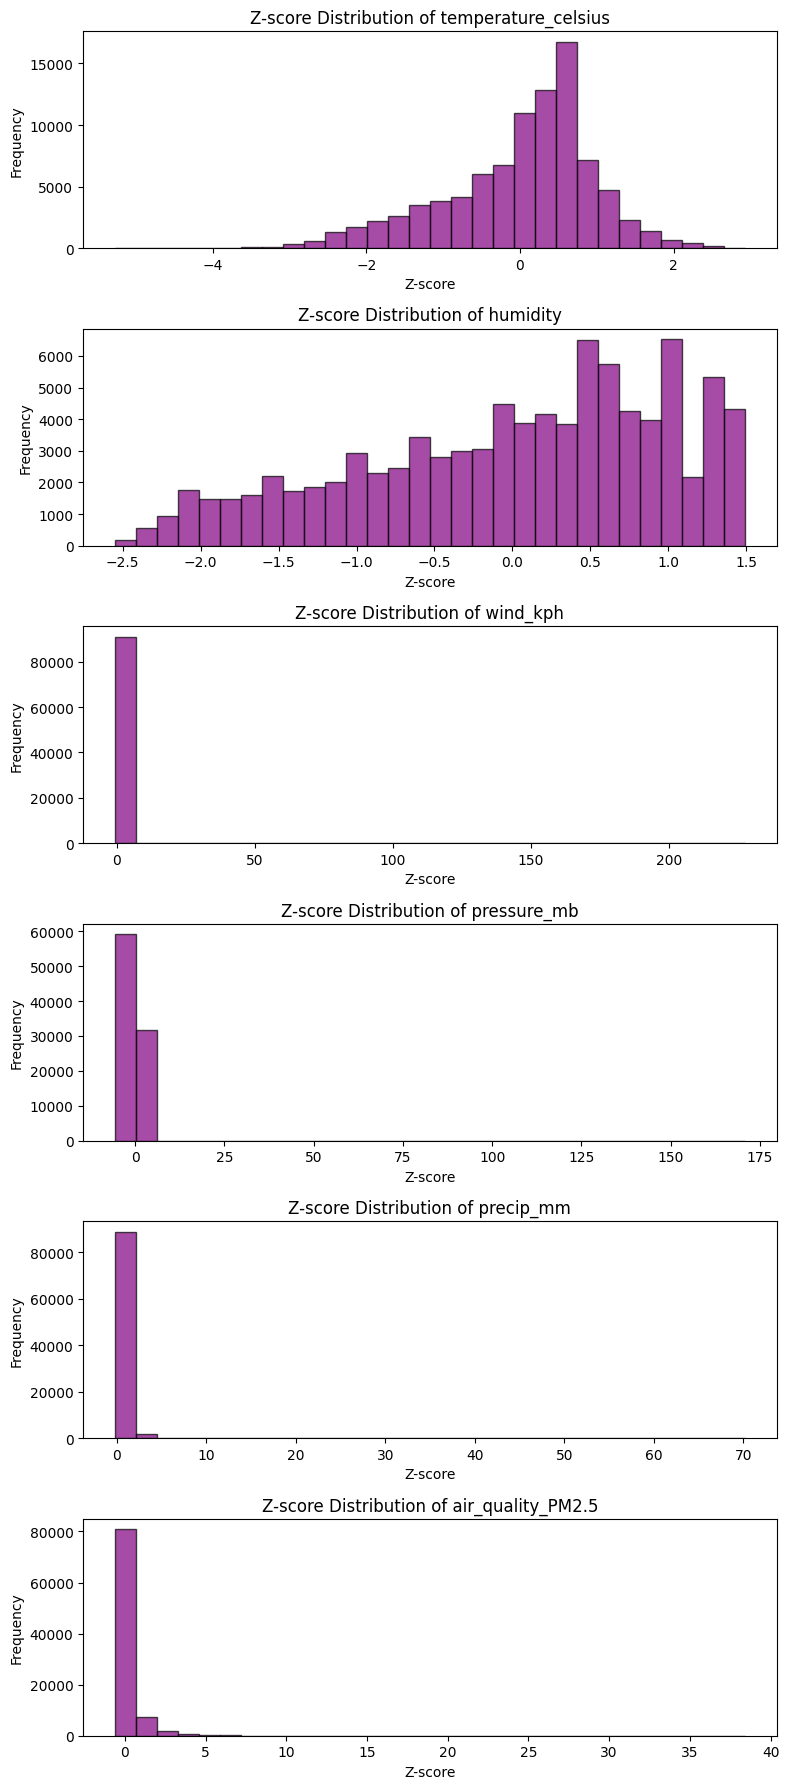

In [ ]:
# Choose a few numeric columns to visualize
cols_to_plot = ["temperature_celsius", "humidity", "wind_kph",
                "pressure_mb", "precip_mm", "air_quality_PM2.5"]

# Plot only Z-score distributions (one below the other)
plt.figure(figsize=(8, 18))  # Taller figure for vertical layout

for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(len(cols_to_plot), 1, i)
    plt.hist(df_standardized[col].dropna(), bins=30,
             color="purple", edgecolor="black", alpha=0.7)
    plt.title(f"Z-score Distribution of {col}")
    plt.xlabel("Z-score")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

plt.show()


In [ ]:
#Find the top 5 rainiest days per country
rainy_days = (
    df_clean.sort_values("precip_mm", ascending=False)
    .groupby("country")
    .head(5)[["country", "last_updated", "precip_mm"]]
)
display(rainy_days.head(5))

,country,last_updated,precip_mm
33439,Jamaica,2024-11-05 04:00:00,42.24
22098,Vietnam,2024-09-07 19:00:00,27.82
81715,Guinea-Bissau,2025-07-11 08:30:00,27.40
30375,Jamaica,2024-10-20 04:30:00,26.38
19431,Fiji Islands,2024-08-26 00:00:00,26.22


In [ ]:
# Filter the dataset to find records with poor air quality (PM2.5 > 100).
bad_air = df_clean[df_clean['air_quality_PM2.5'] > 100][["country","last_updated","location_name","air_quality_PM2.5"]]
bad_air.head()

,country,last_updated,location_name,air_quality_PM2.5
4,Angola,2024-05-16 09:45:00,Luanda,183.4
35,Chile,2024-05-16 04:45:00,Santiago,211.1
68,Guatemala,2024-05-16 02:45:00,Guatemala City,132.0
78,Indonesia,2024-05-16 15:45:00,Jakarta,196.1
173,Thailand,2024-05-16 15:45:00,Bangkok,115.2


In [ ]:
# Find the top 5 hottest days per country
top_hot_days = (
    df_clean
    .sort_values(by="temperature_celsius", ascending=False)
    .groupby("country")
    .head(5)[["country","location_name","last_updated", "temperature_celsius"]]
)

display(top_hot_days.head(5))


,country,location_name,last_updated,temperature_celsius
6896,Kuwait,Kuwait City,2024-06-19 16:45:00,49.2
7460,Iraq,Baghdad,2024-06-22 16:45:00,49.1
11145,Iraq,Baghdad,2024-07-11 15:45:00,49.1
8425,Kuwait,Kuwait City,2024-06-27 16:15:00,48.9
85049,Kuwait,Kuwait City,2025-07-28 11:30:00,48.8


In [ ]:
min_date = df_clean["last_updated"].min()
max_date = df_clean["last_updated"].max()

# Duration in days
duration_days = (max_date - min_date).days

print(f"Data covers from {min_date.date()} to {max_date.date()} ({duration_days} days)")

Data covers from 2024-05-16 to 2025-08-27 (468 days)
